In [11]:
import numpy as np
import pandas as pd
import os
import keras  
from keras.datasets import mnist 
from keras.models import Model 
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten 
from keras import backend as k

In [12]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [13]:
#Load Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data() 

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


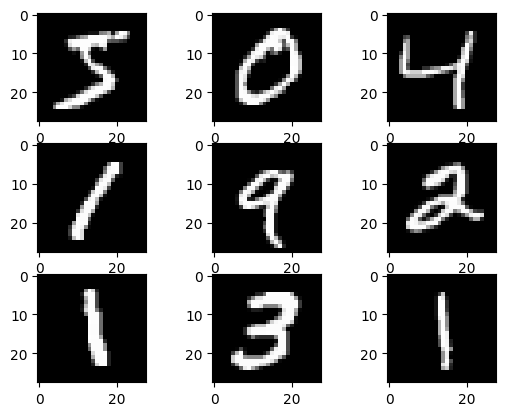

In [14]:
from matplotlib import pyplot
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
# Visualize Sample Images
for i in range(9):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [15]:
# Preprocess Data
img_rows, img_cols=28, 28
if k.image_data_format() == 'channels_first': 
   x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols) 
   x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols) 
   inpx = (1, img_rows, img_cols) 
else:
   x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1) 
   x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1) 
   inpx = (img_rows, img_cols, 1)

In [16]:
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32') 
x_train /= 255
x_test /= 255

In [17]:
y_train = keras.utils.to_categorical(y_train) 
y_test = keras.utils.to_categorical(y_test)

In [18]:
# Build the Model
inpx = Input(shape=inpx) 
layer1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inpx) 
layer2 = Conv2D(64, (3, 3), activation='relu')(layer1) 
layer3 = MaxPooling2D(pool_size=(3, 3))(layer2) 
layer4 = Dropout(0.5)(layer3)
 
layer5 = Flatten()(layer4) 
layer6 = Dense(250, activation='sigmoid')(layer5) 
layer7 = Dense(10, activation='softmax')(layer6) 

In [19]:
model = Model([inpx], layer7) 
# Compile the Model
model.compile(optimizer=keras.optimizers.Adadelta(), 
              loss=keras.losses.categorical_crossentropy, 
              metrics=['accuracy'])
# Train the Model
model.fit(x_train, y_train, epochs=150, batch_size=500)

Epoch 1/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 14s 110ms/step - accuracy: 0.0986 - loss: 2.6290
Epoch 2/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 13s 108ms/step - accuracy: 0.0998 - loss: 2.6074
Epoch 3/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 13s 110ms/step - accuracy: 0.0989 - loss: 2.5833
Epoch 4/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 14s 113ms/step - accuracy: 0.0989 - loss: 2.5577
Epoch 5/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 13s 111ms/step - accuracy: 0.0991 - loss: 2.5289
Epoch 6/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 22s 187ms/step - accuracy: 0.0990 - loss: 2.5088
Epoch 7/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 14s 113ms/step - accuracy: 0.0988 - loss: 2.4851
Epoch 8/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 14s 116ms/step - accuracy: 0.0961 - loss: 2.4631
Epoch 9/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 14s 116ms/step - accuracy: 0.1005 - loss: 2.4392
Epoch 10/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 14s 117ms/step - accuracy: 0.0971 - loss: 2.4180
Epoch 11/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 14s 113ms/step - accuracy: 0.0996 - loss: 2.3935
Epoch 12

In [20]:
# Evaluate the Model
score = model.evaluate(x_test, y_test, verbose=0)
print('loss=',score[0])
print('accuracy=', score[1])

loss= 0.44026288390159607
accuracy= 0.876800000667572


In [21]:
#single Value predication in number
predictions = model.predict(x_test)
print(np.argmax(np.round(predictions[9])))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
0


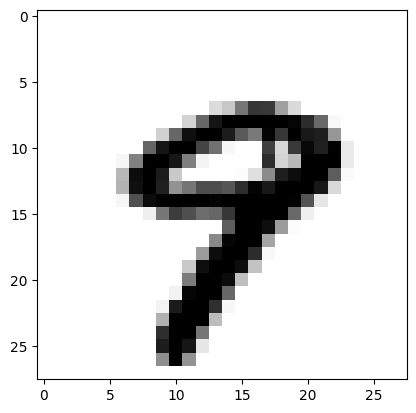

In [22]:
# Visualize Sample Images
import matplotlib.pyplot as plt
plt.imshow(x_test[9].reshape(28, 28), cmap = plt.cm.binary)
plt.show()